In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [3]:
ROOT = '../'

In [6]:
df = pd.read_csv(ROOT + 'dataset/data.csv')
#drop last column
df = df.iloc[:, :-1]
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
df_mean_features = df.iloc[:,1:12]
features_name= list(df_mean_features.columns)[1:]
df_mean_features.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [24]:
df_mean_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB


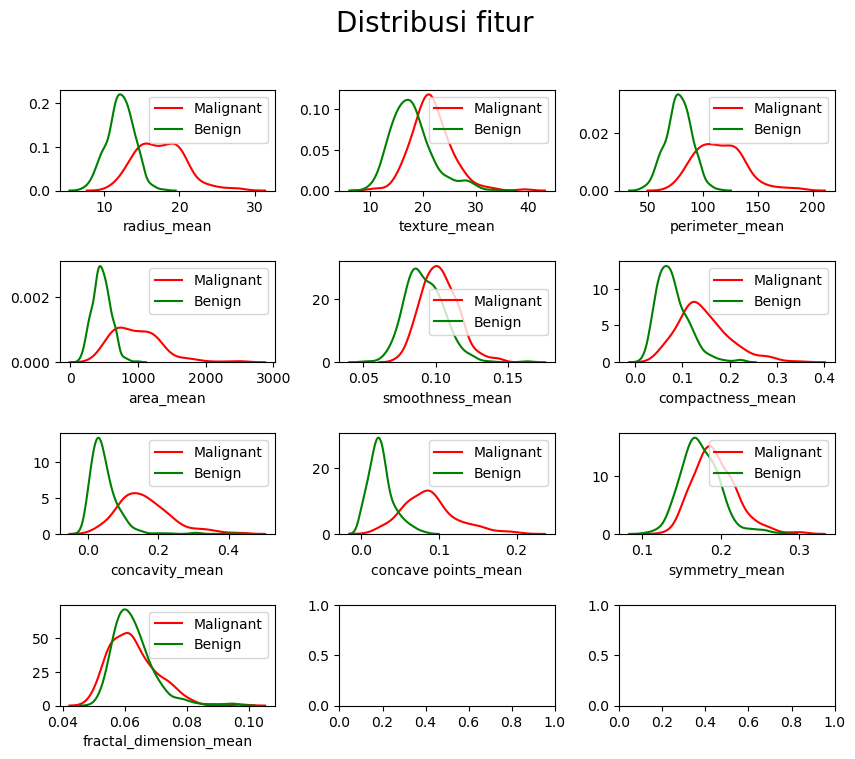

In [25]:
# Plot KDE Berdasarkan Target
import matplotlib.pyplot as plt
import seaborn as sns
def plot_kde(data,start,end,row_num,col_num,title,target ):
    df_set_pos = data[data[target] == "M"].drop(target,axis = 1)
    df_set_neg = data[data[target] == "B"].drop(target,axis = 1)
    df_set_pos = df_set_pos.iloc[:,start:end+1]
    df_set_neg = df_set_neg.iloc[:,start:end +1]
    #plot numerical data (Classification Task)
    numerical = df_set_pos.select_dtypes(include=['int64', 'float64']).columns
    fig, axes = plt.subplots(row_num,col_num,figsize = (10,8))
    fig.subplots_adjust(hspace=0.7, wspace=0.3)
    fig.suptitle(title,fontsize = 20)
    row = 0
    cols = 0

    for item in numerical:
        if cols > col_num -1:
            cols = 0
            row += 1
        ax1 = sns.kdeplot(x = item,data = df_set_pos,ax = axes[row,cols],color = "red" ,label = "Malignant")
        ax2 = sns.kdeplot(x = item,data = df_set_neg,ax = axes[row,cols],color = "green" ,label = "Benign")
        ax1.legend()
        ax1.set_ylabel("")
        ax2.set_ylabel("")
        cols += 1

plot_kde(df_mean_features,0,11,4,3,'Distribusi fitur',"diagnosis")

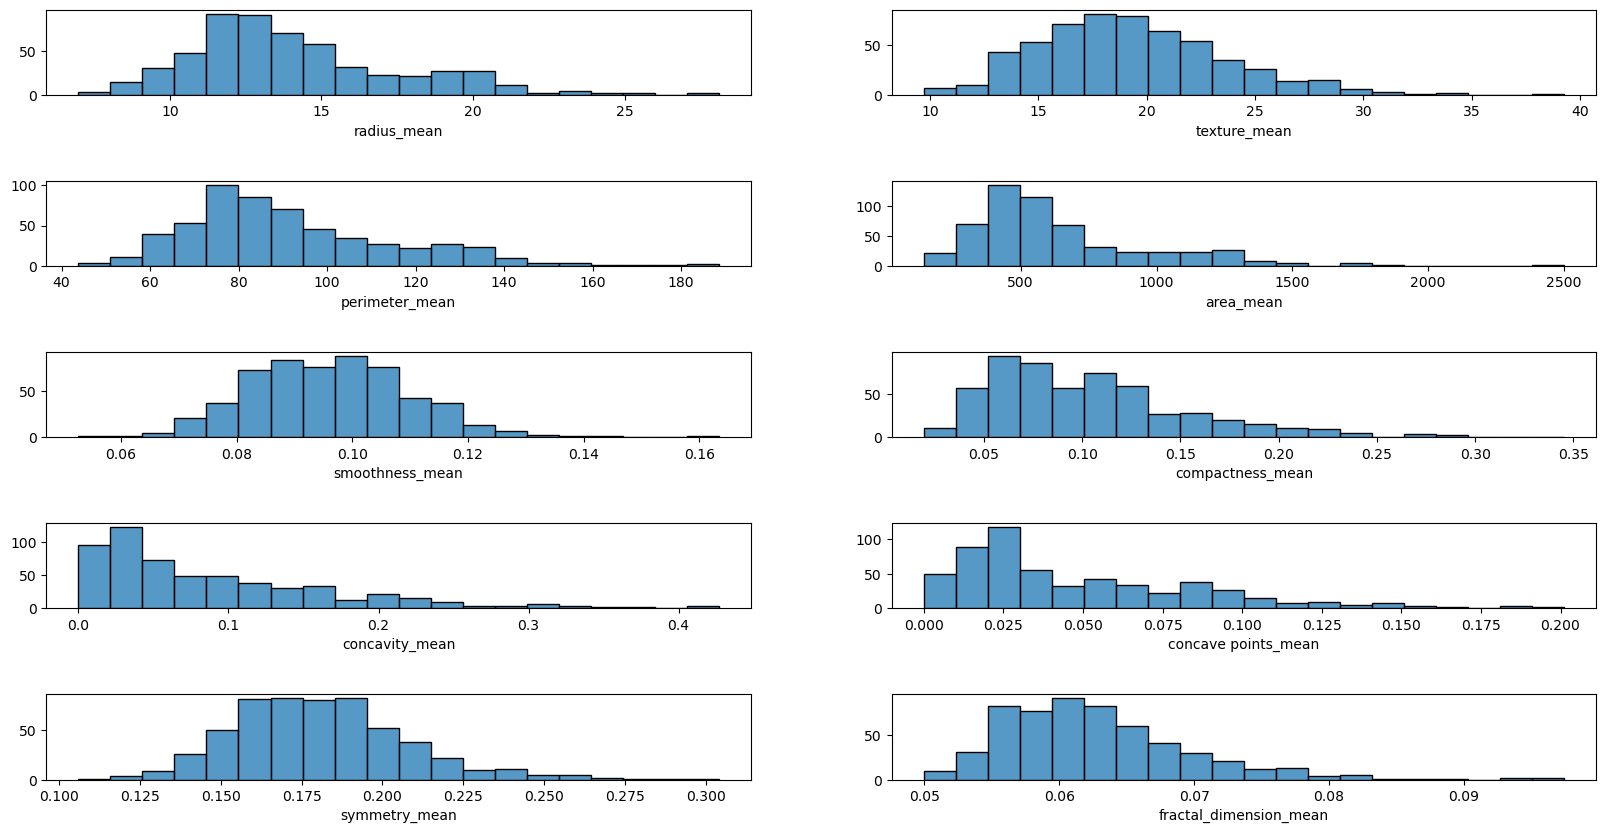

In [33]:
#plot distribution of features
numerical = df_mean_features.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(5,2,figsize = (20,10))
fig.subplots_adjust(hspace=1, wspace=0.2)
row = 0
cols = 0

for item in numerical:
    if cols > 1:
        cols = 0
        row += 1
    ax = sns.histplot(x=item,data=df_mean_features ,ax=axes[row, cols],bins = 20)
    ax.set_ylabel("")
    cols += 1

<Axes: >

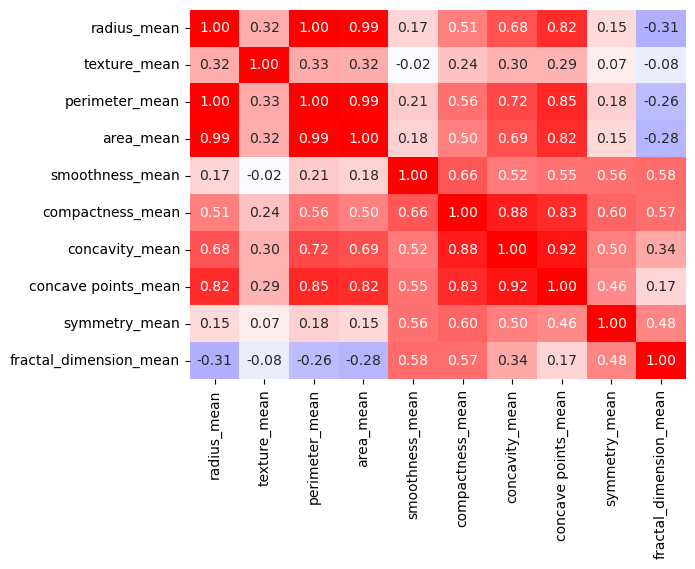

In [37]:
sns.heatmap(df_mean_features[features_name].corr(method="pearson"),cmap = "bwr" ,vmin = -1,vmax=1,annot = True,cbar = False,fmt = ".2f")

In [56]:
def correlation(dataset, threshold):
    df_corr = dataset.corr(method="pearson")
    columns = np.full((df_corr.shape[0],), True, dtype=bool)
    for i in range(df_corr.shape[0]):
        for j in range(i+1, df_corr.shape[0]):
            if df_corr.iloc[i,j] >= threshold:
                if columns[j]:
                    columns[j] = False
    selected_columns = df_corr.columns[columns]
    return list(selected_columns)
uncorr_features = correlation(df_mean_features[features_name],0.95)
print(uncorr_features)
print(len(uncorr_features))

['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
8


Text(0.5, 0, 'Diagnosis')

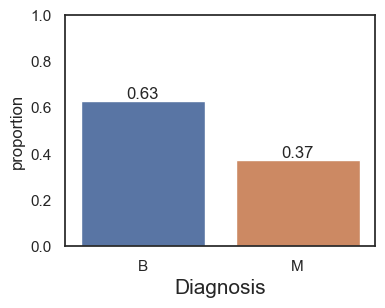

In [80]:
#plot distribution of diagnosis
df_proportion = df_mean_features.diagnosis.value_counts(normalize=True).to_frame().reset_index()
plt.figure(figsize = (4,3))
sns.set_style("white")
sns.barplot(x = "diagnosis",y = "proportion",data = df_proportion)
#add data labels
for i in range(df_proportion.shape[0]):
    count = df_proportion.iloc[i,1]
    plt.text(i,count+0.01,round(count,2),ha = "center")
plt.ylim(0,1)
plt.xlabel("Diagnosis",fontsize = 15)

In [83]:
## stratified shuffle
X = df_mean_features.drop(columns="diagnosis")
y = df_mean_features["diagnosis"]
#replace M and B with 1 and 0
y = y.replace({"M":1,"B":0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 10), (114, 10), (455,), (114,))

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
   ("numerical",num_pipe,uncorr_features)
],remainder = "drop",verbose_feature_names_out=False).set_output(transform = "pandas")

In [91]:
preprocessor.fit(X_train)
preprocessor.transform(X_train)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
10,0.518559,0.891826,-0.974744,-0.689772,-0.688586,-0.398175,-1.039155,-0.825056
170,-0.516364,-1.639710,0.476219,-0.631834,-0.604281,-0.303075,0.521543,-0.454523
407,-0.368118,0.455515,-1.432979,-0.383927,-0.342175,-0.765459,-0.850857,-0.226171
430,0.205285,0.726168,0.243253,2.203585,2.256094,1.213233,0.818474,0.899791
27,1.243005,0.194195,-0.111442,0.051348,0.732962,0.713767,-0.427187,-0.822184
...,...,...,...,...,...,...,...,...
37,-0.317771,-0.232783,-0.431157,-1.228852,-0.778896,-0.499077,-1.260042,-0.586651
415,-0.636639,0.408851,0.121524,-0.420324,-0.779754,-0.686756,0.738810,0.026596
458,-0.326162,1.332803,-0.860710,-0.986145,-0.945056,-0.791946,-0.535821,-1.181228
476,0.009489,0.259525,-0.467536,0.129341,-0.472432,-0.465023,-1.118819,-0.376969


In [95]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


df_model = pd.DataFrame(columns = ["model","set_data","score"])
set_data = ["test","cross_val"]
models = {
        "KNN" : KNeighborsClassifier(),
        "SVM":SVC(),
        "Random Forest":RandomForestClassifier(random_state = 42,n_jobs = -1),
        "Logistic Regression" : LogisticRegression(random_state = 42), 
        "LGBM" : LGBMClassifier(random_state = 42),
        "XGB" : XGBClassifier(random_state = 42) 
        }

scorer = "accuracy"
num_cv = 3
cv = StratifiedKFold(n_splits = num_cv,shuffle = True,random_state = 42)

for m in models:
    pipeline = Pipeline([  
    ('prep', preprocessor), 
    ('algo', models[m])
])
    spot_check = cross_val_score(pipeline,X_train,y_train,cv = cv,scoring = scorer,n_jobs= -1 )
    spot_check = spot_check.mean()
    model = pipeline.fit(X_train,y_train)
    score = pipeline.score(X_test,y_test)
    model_list = [m] * 2
    tes = pd.DataFrame(list(zip(model_list,set_data,[score,spot_check])),columns = ["model","set_data","score"])
    df_model = pd.concat([df_model,tes],ignore_index = True)

In [96]:
df_model

,model,set_data,score
0,KNN,test,0.956140
1,KNN,cross_val,0.934065
2,SVM,test,0.973684
3,SVM,cross_val,0.940673
4,Random Forest,test,0.947368
5,Random Forest,cross_val,0.934065
6,Logistic Regression,test,0.929825
7,Logistic Regression,cross_val,0.934051
8,LGBM,test,0.964912
9,LGBM,cross_val,0.936258


## KNN

In [165]:
from sklearn.metrics import classification_report
import optuna 
def tuning_model(objective,pipeline,n_trial = 100):
    study = optuna.create_study(direction="maximize",sampler=optuna.samplers.RandomSampler(seed=42))
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study.optimize(objective, n_trials=n_trial,show_progress_bar=True,)
    best_params = study.best_params
    pipeline.set_params(**best_params)
    pipeline.fit(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    train_score = pipeline.score(X_train, y_train)
    valid_score = study.best_value
    y_pred = pipeline.predict(X_test)
    print("best params:", best_params)
    print("train score:", train_score)
    print("test score:", test_score)
    print("valid score:", valid_score)
    print(classification_report(y_test, y_pred))
    return pipeline

In [158]:
pipeline_knn = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

def objective_knn(trial):
    n_neighbors = trial.suggest_int("algo__n_neighbors", 1, 25)
    p = trial.suggest_int("algo__p", 1, 2)
    model = KNeighborsClassifier(n_neighbors=n_neighbors, p=p)
    pipeline_knn.set_params(algo=model)
    return cross_val_score(pipeline_knn, X_train, y_train, cv=cv, scoring=scorer).mean()
pipeline_knn = tuning_model(objective_knn,pipeline_knn)

  0%|          | 0/100 [00:00<?, ?it/s]

best params: {'algo__n_neighbors': 10, 'algo__p': 2}
train score: 0.9494505494505494
test score: 0.9649122807017544
valid score: 0.9450592540955037
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [159]:
#save pipeline_knn 
import pickle
pickle.dump(pipeline_knn, open(ROOT + 'model/model_knn.pkl', 'wb'))

## SVM

In [161]:
pipeline_svm = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC())
])

def objective_svm(trial):
    C = trial.suggest_float("algo__C", 1e-5, 1e5,log = True)
    gamma = trial.suggest_categorical("algo__gamma", ["scale", "auto"])
    kernel = trial.suggest_categorical("algo__kernel", ["rbf", "poly", "sigmoid"])
    model = SVC(C=C, gamma=gamma, kernel=kernel, probability=True)
    pipeline_svm.set_params(algo=model)
    return cross_val_score(pipeline_svm, X_train, y_train, cv=cv, scoring=scorer).mean()
pipeline_svm = tuning_model(objective_svm,pipeline_svm)


  0%|          | 0/100 [00:00<?, ?it/s]

best params: {'algo__C': 1.1285575862709276, 'algo__gamma': 'scale', 'algo__kernel': 'rbf'}
train score: 0.9626373626373627
test score: 0.9736842105263158
valid score: 0.9450592540955037
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [162]:
import pickle
pickle.dump(pipeline_svm, open(ROOT + 'model/model_svm.pkl', 'wb'))

## Random Forest

In [163]:
## Random Forest
pipeline_rf = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(random_state=42, n_jobs=-1))
])

def objective_rf(trial):
    n_estimators = trial.suggest_int("algo__n_estimators", 100, 1000, step=100)
    max_depth = trial.suggest_int("algo__max_depth", 1, 10)
    min_samples_leaf = trial.suggest_int("algo__min_samples_leaf", 1, 10)
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42, n_jobs=-1)
    pipeline_rf.set_params(algo=model)
    return cross_val_score(pipeline_rf, X_train, y_train, cv=cv, scoring=scorer).mean()

pipeline_rf = tuning_model(objective_rf,pipeline_rf)

  0%|          | 0/100 [00:00<?, ?it/s]

best params: {'algo__n_estimators': 1000, 'algo__max_depth': 8, 'algo__min_samples_leaf': 2}
train score: 0.9912087912087912
test score: 0.9473684210526315
valid score: 0.9362582781456954
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [143]:
import pickle
pickle.dump(pipeline_rf, open(ROOT + 'model/model_rf.pkl', 'wb'))

In [164]:
## Logistic Regression
pipeline_lr = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(random_state=42))
])

def objective_lr(trial):
    C = trial.suggest_float("algo__C", 1e-5, 1e5, log=True)
    solver = trial.suggest_categorical("algo__solver", ["newton-cg", "lbfgs", "liblinear", "sag", "saga"])
    model = LogisticRegression(C=C, solver=solver, random_state=42)
    pipeline_lr.set_params(algo=model)
    return cross_val_score(pipeline_lr, X_train, y_train, cv=cv, scoring=scorer).mean()

pipelien_lr = tuning_model(objective_lr,pipeline_lr)

  0%|          | 0/100 [00:00<?, ?it/s]

d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarn

best params: {'algo__C': 2.931587042311713, 'algo__solver': 'lbfgs'}
train score: 0.945054945054945
test score: 0.9298245614035088
valid score: 0.9384367375392122
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        72
           1       0.89      0.93      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [149]:
import pickle
pickle.dump(pipeline_lr, open(ROOT + 'model/model_lr.pkl', 'wb'))

In [166]:
## XGBoost
pipeline_xgb = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(random_state=42, n_jobs=-1))
])

def objective(trial):
    n_estimators = trial.suggest_int("algo__n_estimators", 100, 1000, step=100)
    max_depth = trial.suggest_int("algo__max_depth", 1, 10)
    learning_rate = trial.suggest_float("algo__learning_rate", 1e-5, 1e-1, log=True)
    gamma = trial.suggest_float("algo__gamma", 1e-5, 1e-1, log=True)
    model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, gamma=gamma, random_state=42, n_jobs=-1)
    pipeline_xgb.set_params(algo=model)
    return cross_val_score(pipeline_xgb, X_train, y_train, cv=cv, scoring=scorer).mean()

pipeline_xgb = tuning_model(objective,pipeline_xgb)

  0%|          | 0/100 [00:00<?, ?it/s]

best params: {'algo__n_estimators': 300, 'algo__max_depth': 3, 'algo__learning_rate': 0.07799059237255677, 'algo__gamma': 0.00037358626308127543}
train score: 1.0
test score: 0.9473684210526315
valid score: 0.9428662716393633
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [167]:
import pickle
pickle.dump(pipeline_xgb, open(ROOT + 'model/model_xgb.pkl', 'wb'))

In [168]:
pipeline_lgbm = Pipeline([
    ('prep', preprocessor),
    ('algo', LGBMClassifier(random_state=42, n_jobs=-1))
])

def objective(trial):
    n_estimators = trial.suggest_int("algo__n_estimators", 100, 1000, step=100)
    max_depth = trial.suggest_int("algo__max_depth", 1, 10)
    learning_rate = trial.suggest_float("algo__learning_rate", 1e-5, 1e-1, log=True)
    model = LGBMClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42, n_jobs=-1)
    pipeline_lgbm.set_params(algo=model)
    return cross_val_score(pipeline_lgbm, X_train, y_train, cv=cv, scoring=scorer).mean()

pipeline_lgbm = tuning_model(objective,pipeline_lgbm)


  0%|          | 0/100 [00:00<?, ?it/s]

best params: {'algo__n_estimators': 1000, 'algo__max_depth': 10, 'algo__learning_rate': 0.01712337597316398}
train score: 1.0
test score: 0.956140350877193
valid score: 0.9406587661205995
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [169]:
import pickle
pickle.dump(pipeline_lgbm, open(ROOT + 'model/model_lgbm.pkl', 'wb'))